<a href="https://colab.research.google.com/github/emkafie/Machine-Learning/blob/main/P3_JS11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktikum 3**

## **Langkah 1**

In [1]:
# ==========================================
# IMPORT LIBRARY & FUNGSI BANTUAN
# ==========================================
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

# Konfigurasi style plot
sns.set()

In [2]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Fungsi untuk memvisualisasikan decision boundary SVM"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X_grid = np.meshgrid(y, x)
    xy = np.vstack([X_grid.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X_grid.shape)

    # Plot batas dan margin
    ax.contour(X_grid, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # Plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none', edgecolors='k')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

## **LANGKAH 2: BUAT DATA DUMMY (HIGH OVERLAP)**

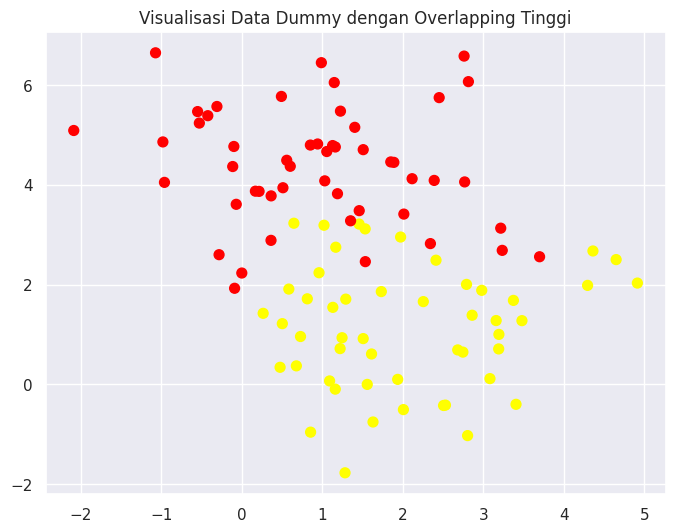

In [3]:
# Membuat data dengan standar deviasi klaster yang besar (1.2)
X_overlap, y_overlap = make_blobs(n_samples=100, centers=2,
                                  random_state=0, cluster_std=1.2)

plt.figure(figsize=(8, 6))
plt.scatter(X_overlap[:, 0], X_overlap[:, 1], c=y_overlap, s=50, cmap='autumn')
plt.title("Visualisasi Data Dummy dengan Overlapping Tinggi")
plt.show()

Gambar di atas memperlihatkan sebaran data dua kelas (merah dan kuning) yang memiliki tingkat tumpang tindih (overlapping) yang signifikan. Hal ini disebabkan oleh parameter cluster_std yang diatur cukup tinggi (1.2). Pada kondisi ini, sulit untuk memisahkan kedua kelas secara sempurna hanya dengan menggunakan garis lurus tanpa mentoleransi adanya kesalahan klasifikasi.

## **LANGKAH 3: ANALISIS DAMPAK TUNING PARAMETER C**

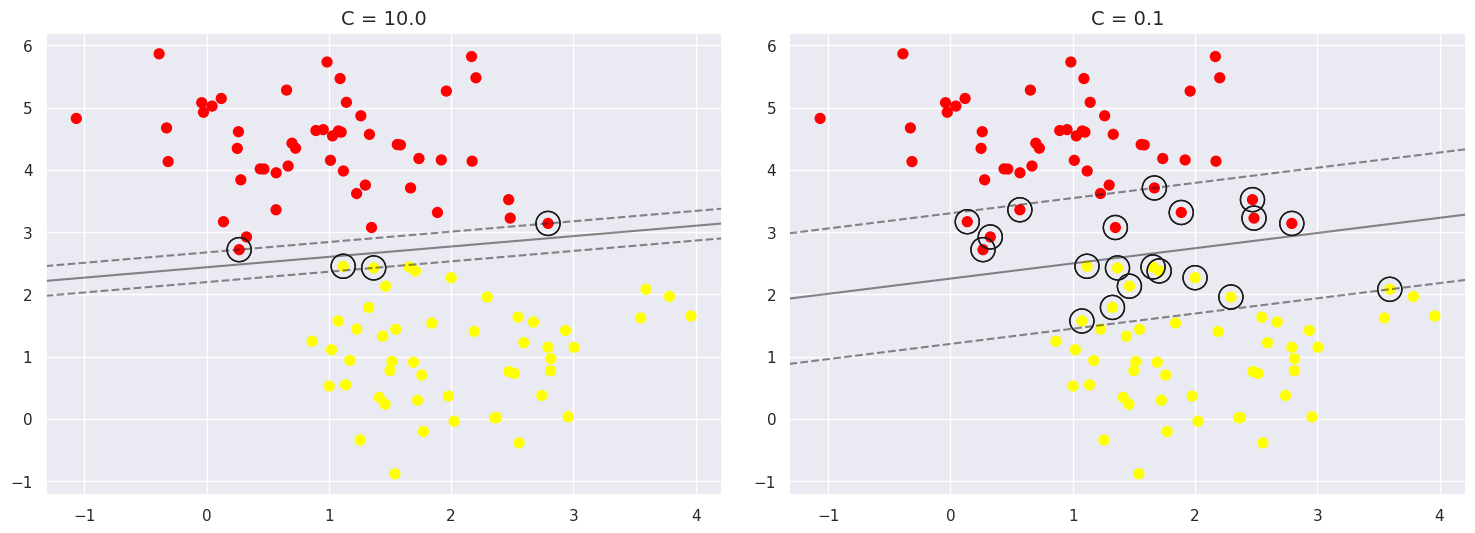

In [4]:
# Membuat data baru dengan sebaran sedikit lebih rapat (std=0.8) untuk eksperimen
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# Loop untuk membandingkan nilai C=10.0 dan C=0.1
for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    # Menampilkan support vectors
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none', edgecolors='k')
    axi.set_title('C = {0:.1f}'.format(C), size=14)

plt.show()

Plot Kiri ($C = 10.0$):
* Nilai C yang besar memberikan penalti yang berat terhadap kesalahan klasifikasi.
* Model berusaha meminimalisir kesalahan klasifikasi pada data latih sekuat mungkin.
* Hasilnya adalah margin (jarak antara garis putus-putus) menjadi lebih sempit. Model ini cenderung lebih "kaku" (Hard Margin) dan sensitif terhadap outlier.

Plot Kanan ($C = 0.1$):
* Nilai C yang kecil memberikan toleransi yang lebih besar terhadap kesalahan klasifikasi.
* Model mengizinkan beberapa titik data masuk ke dalam area margin atau bahkan berada di sisi yang salah demi mendapatkan margin yang lebih lebar.
* Hasilnya adalah margin menjadi lebih luas (Soft Margin). Model ini cenderung lebih general dan lebih baik dalam menangani data yang tumpang tindih (overlapping), meskipun akurasi pada data latih mungkin sedikit menurun.